In this lab, we are going to learn how to prepare data for training a model


In [134]:
import pandas as pd
import numpy as np


In [135]:
df= pd.read_csv('/content/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [136]:
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [137]:
df['cp'].unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


<Axes: >

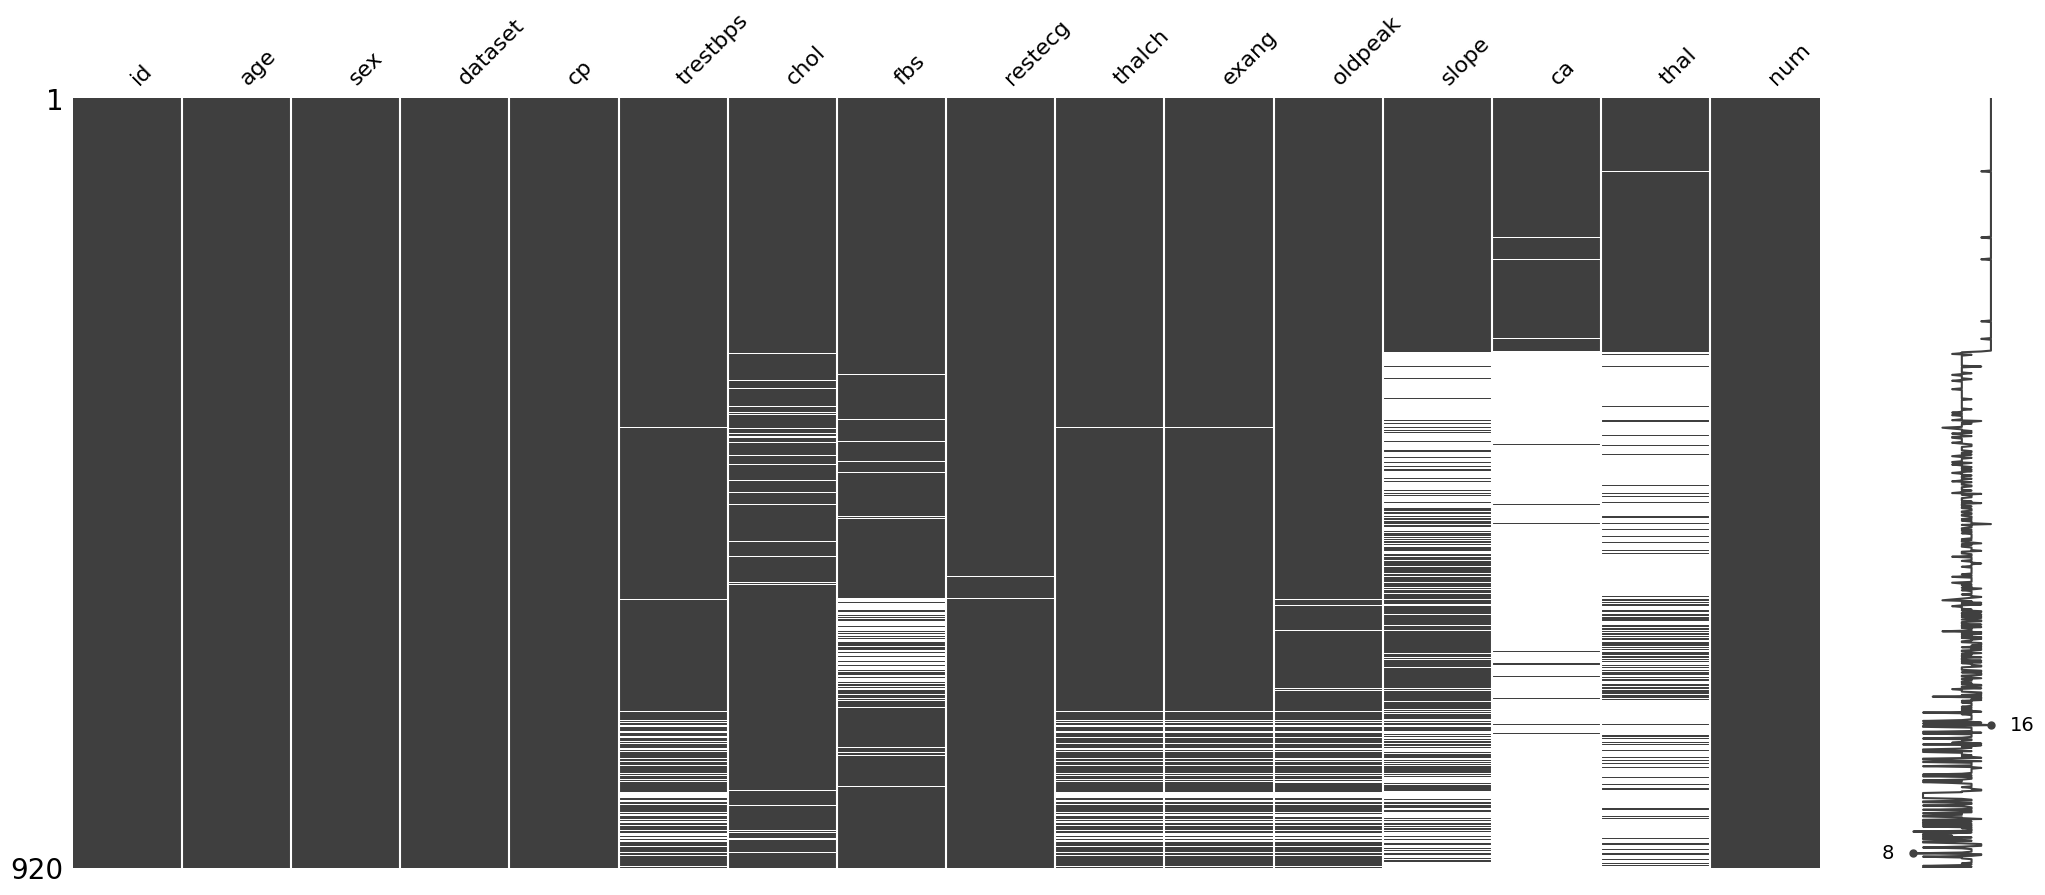

In [139]:
import missingno as mp
mp.matrix(df)

In [140]:


df['oldpeak']=df['oldpeak'].fillna(df['oldpeak'].mode()[0])
df['chol']=df['chol'].fillna(df['chol'].median())
df['trestbps']=df['trestbps'].fillna(df['trestbps'].median())
df['thalch']=df['thalch'].fillna(df['thalch'].median())


In [141]:
df.drop(columns=['slope','ca','fbs','thal','restecg','exang'],inplace=True)
# df.dropna(subset=['thalch'],inplace=True)

<Axes: >

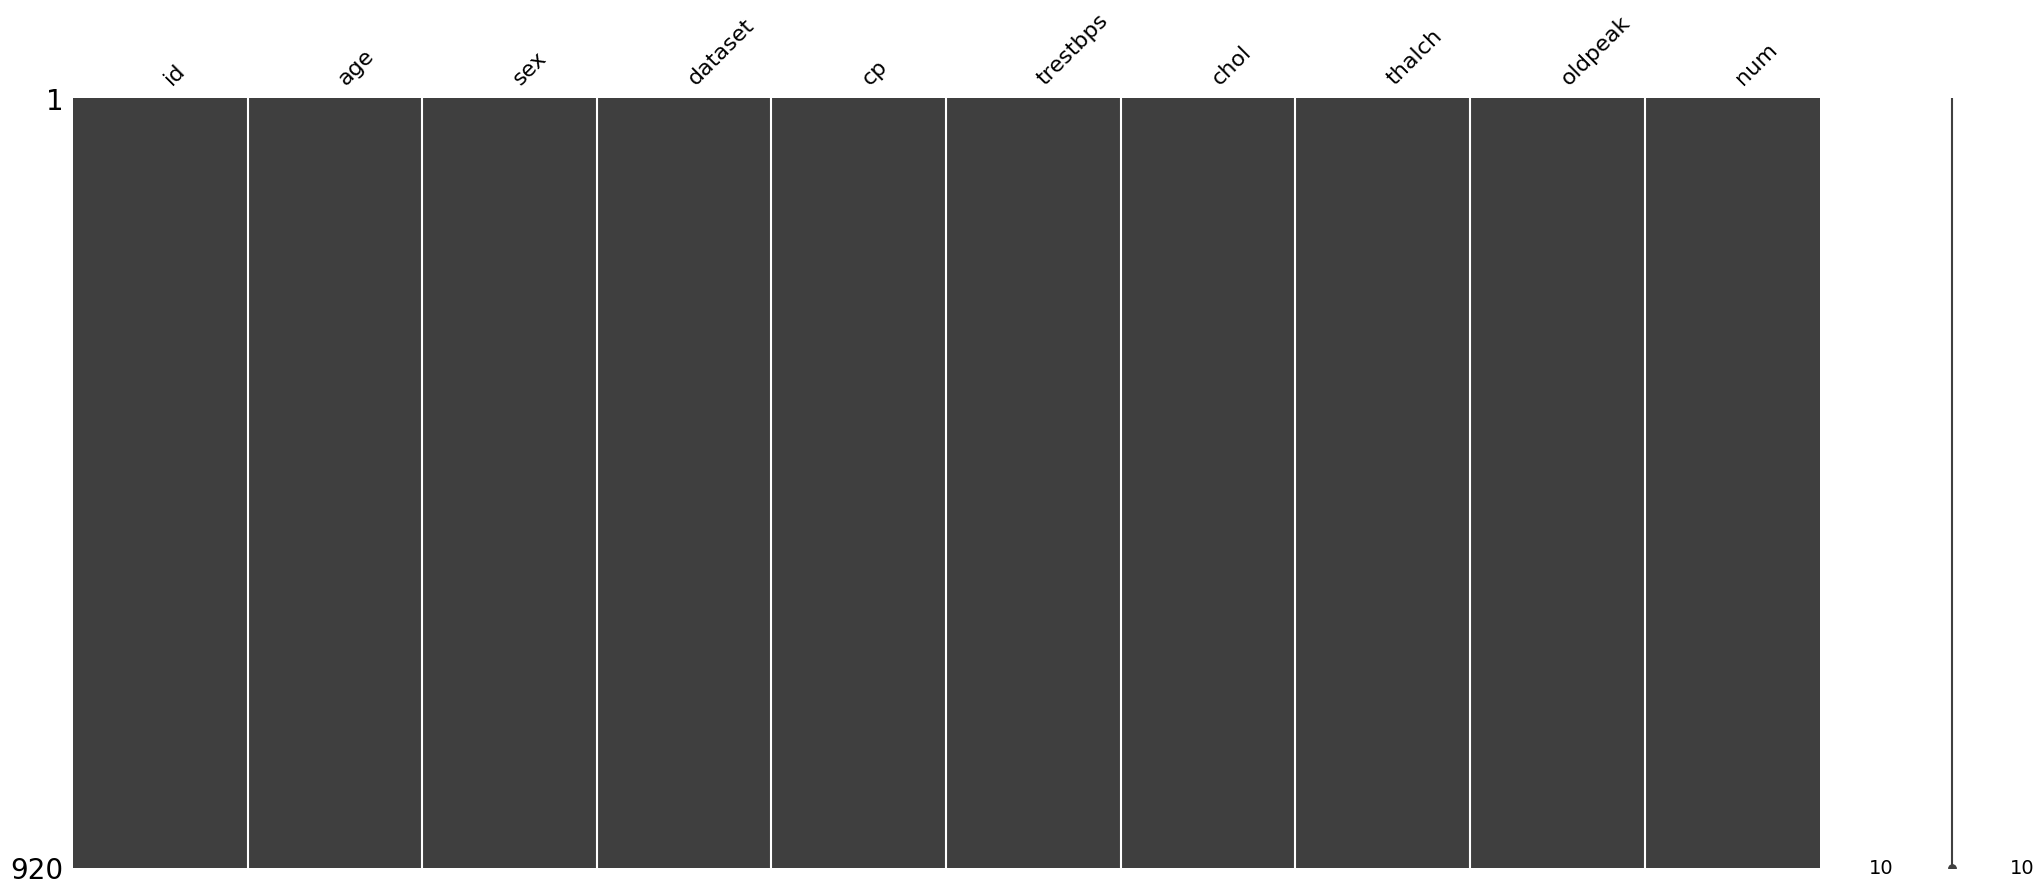

In [142]:
mp.matrix(df)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   thalch    920 non-null    float64
 8   oldpeak   920 non-null    float64
 9   num       920 non-null    int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 72.0+ KB


In [144]:
df

,id,age,sex,dataset,cp,trestbps,chol,thalch,oldpeak,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,150.0,2.3,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,108.0,1.5,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,129.0,2.6,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,187.0,3.5,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,172.0,1.4,0
...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,154.0,0.0,1
916,917,62,Male,VA Long Beach,typical angina,130.0,139.0,140.0,0.0,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,100.0,0.0,2
918,919,58,Male,VA Long Beach,asymptomatic,130.0,385.0,140.0,0.0,0


In [145]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
thalch,0
oldpeak,0
num,0


In [146]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

In [147]:
#feature extraction:one hot encode categorical features

categorical_features=['sex','cp']
onehot_encounter=OneHotEncoder(sparse_output=False,drop='first')
encoded_features=onehot_encounter.fit_transform(df[categorical_features])
encode_df=pd.DataFrame(encoded_features,columns=onehot_encounter.get_feature_names_out(categorical_features))
data=pd.concat([df.drop(columns=categorical_features),encode_df],axis=1)

In [148]:
data

,id,age,dataset,trestbps,chol,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina
0,1,63,Cleveland,145.0,233.0,150.0,2.3,0,1.0,0.0,0.0,1.0
1,2,67,Cleveland,160.0,286.0,108.0,1.5,2,1.0,0.0,0.0,0.0
2,3,67,Cleveland,120.0,229.0,129.0,2.6,1,1.0,0.0,0.0,0.0
3,4,37,Cleveland,130.0,250.0,187.0,3.5,0,1.0,0.0,1.0,0.0
4,5,41,Cleveland,130.0,204.0,172.0,1.4,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,VA Long Beach,127.0,333.0,154.0,0.0,1,0.0,0.0,0.0,0.0
916,917,62,VA Long Beach,130.0,139.0,140.0,0.0,0,1.0,0.0,0.0,1.0
917,918,55,VA Long Beach,122.0,223.0,100.0,0.0,2,1.0,0.0,0.0,0.0
918,919,58,VA Long Beach,130.0,385.0,140.0,0.0,0,1.0,0.0,0.0,0.0


In [149]:
df

,id,age,sex,dataset,cp,trestbps,chol,thalch,oldpeak,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,150.0,2.3,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,108.0,1.5,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,129.0,2.6,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,187.0,3.5,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,172.0,1.4,0
...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,154.0,0.0,1
916,917,62,Male,VA Long Beach,typical angina,130.0,139.0,140.0,0.0,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,100.0,0.0,2
918,919,58,Male,VA Long Beach,asymptomatic,130.0,385.0,140.0,0.0,0


In [150]:
#extracting features:
def bp_category(bp):
  if pd.isna(bp):
    return "unknown"
  elif bp< 120:
    return 'normal'
  elif 120 <= bp <=129:
    return 'elecated'
  elif 130 <= bp <= 139:
    return 'Hypertension 1'
  else:
    return 'Hyppertension 2'

df['bps_category']= df['trestbps'].apply(bp_category)


#for cp
cp_num = {
    'typical angina': 1,
    'atypical angina': 2,
    'non-anginal': 3,
    'asymptomatic': 4
}
#dataset
dataset_num={
    'Cleveland':1,
    'Hungary':2,
    'Switzerland':3,
    'VA Long Beach':4
}

df['cp_numeric']=df['cp'].map(cp_num)
df['dataset_num']=df['dataset'].map(dataset_num)

df.drop(['trestbps','cp'], axis=1, inplace=True)


In [151]:
df

,id,age,sex,dataset,chol,thalch,oldpeak,num,bps_category,cp_numeric,dataset_num
0,1,63,Male,Cleveland,233.0,150.0,2.3,0,Hyppertension 2,1,1
1,2,67,Male,Cleveland,286.0,108.0,1.5,2,Hyppertension 2,4,1
2,3,67,Male,Cleveland,229.0,129.0,2.6,1,elecated,4,1
3,4,37,Male,Cleveland,250.0,187.0,3.5,0,Hypertension 1,3,1
4,5,41,Female,Cleveland,204.0,172.0,1.4,0,Hypertension 1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,333.0,154.0,0.0,1,elecated,4,4
916,917,62,Male,VA Long Beach,139.0,140.0,0.0,0,Hypertension 1,1,4
917,918,55,Male,VA Long Beach,223.0,100.0,0.0,2,elecated,4,4
918,919,58,Male,VA Long Beach,385.0,140.0,0.0,0,Hypertension 1,4,4


In [152]:
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [153]:
#feature selection
x=df.drop(columns=['dataset','bps_category','sex','id'])
y=df['dataset_num']

In [154]:
#normalize  numerical feature
numerical_feature=['chol','thalch','oldpeak']
scaler=MinMaxScaler()
x[numerical_feature]=scaler.fit_transform(x[numerical_feature])

In [155]:
x

,age,chol,thalch,oldpeak,num,cp_numeric,dataset_num
0,63,0.386401,0.633803,0.556818,0,1,1
1,67,0.474295,0.338028,0.465909,2,4,1
2,67,0.379768,0.485915,0.590909,1,4,1
3,37,0.414594,0.894366,0.693182,0,3,1
4,41,0.338308,0.788732,0.454545,0,2,1
...,...,...,...,...,...,...,...
915,54,0.552239,0.661972,0.295455,1,4,4
916,62,0.230514,0.563380,0.295455,0,1,4
917,55,0.369818,0.281690,0.295455,2,4,4
918,58,0.638474,0.563380,0.295455,0,4,4


In [158]:
#select top feature usinf SelectKBest
selector = SelectKBest(score_func=chi2, k=5)
x_selected = selector.fit_transform(x, y)
selected_features = x.columns[selector.get_support(indices=True)]
print(selected_features)

Index(['age', 'chol', 'num', 'cp_numeric', 'dataset_num'], dtype='object')


In [160]:
#final dataset
final_data=pd.DataFrame(x_selected, columns=selected_features)
final_data['dataset_num']=y
final_data

,age,chol,num,cp_numeric,dataset_num
0,63.0,0.386401,0.0,1.0,1
1,67.0,0.474295,2.0,4.0,1
2,67.0,0.379768,1.0,4.0,1
3,37.0,0.414594,0.0,3.0,1
4,41.0,0.338308,0.0,2.0,1
...,...,...,...,...,...
915,54.0,0.552239,1.0,4.0,4
916,62.0,0.230514,0.0,1.0,4
917,55.0,0.369818,2.0,4.0,4
918,58.0,0.638474,0.0,4.0,4


In [162]:
#split data
x_train, x_test, y_train , y_test= train_test_split(final_data[selected_features], final_data['dataset_num'], test_size=0.2)
x_train

,age,chol,num,cp_numeric,dataset_num
5,56.0,0.391376,0.0,2.0,1
547,54.0,0.369818,1.0,4.0,2
351,41.0,0.482587,0.0,2.0,2
640,53.0,0.000000,1.0,3.0,3
22,58.0,0.470978,1.0,2.0,1
...,...,...,...,...,...
606,38.0,0.000000,1.0,4.0,3
68,59.0,0.540630,2.0,4.0,1
882,57.0,0.286899,3.0,4.0,4
28,43.0,0.409619,0.0,4.0,1


In [163]:
x_test


,age,chol,num,cp_numeric,dataset_num
799,64.0,0.457711,1.0,4.0,4
816,35.0,0.266998,0.0,3.0,4
558,46.0,0.451078,1.0,1.0,2
648,55.0,0.000000,0.0,2.0,3
716,70.0,0.000000,3.0,4.0,3
...,...,...,...,...,...
793,54.0,0.364842,3.0,4.0,4
553,58.0,0.436153,1.0,4.0,2
482,59.0,0.475954,0.0,2.0,2
713,69.0,0.000000,1.0,4.0,3


In [164]:
y_test

,dataset_num
799,4
816,4
558,2
648,3
716,3
...,...
793,4
553,2
482,2
713,3


In [165]:
y_train

,dataset_num
5,1
547,2
351,2
640,3
22,1
...,...
606,3
68,1
882,4
28,1
